Car Prediction Model(used cars)

By Elma Fortunate Phiri

Problem Statement:


The price of a car is influenced by a multitude of factors, including brand reputation, features, horsepower, mileage, age, and market demand. Accurately predicting car prices is a challenging task due to the complex interplay of these variables. Traditional methods of price estimation often rely on subjective assessments or simplistic rules, which may not capture the nuanced relationships between car attributes and their market value. This project aims to address this challenge by leveraging machine learning techniques to build a predictive model that can accurately estimate car prices based on relevant features.


Objectives: Identify key drivers of car prices and provide actionable insights for sellers.
Data Source: A dataset of 300 car sales records, including variables such as car name, year, selling price, present price, kilometers driven, fuel type, transmission type, and owner history.
Scope: The analysis focuses on cars sold between 2003 and 2018.

Aim:

The aim of this project is to develop a machine learning model that can predict the price of a car based on its features.

Data Overview 
🚗 Car_Name: Categorical variable representing the model of the vehicle, including both cars and motorcycles.
📅 Year: indicates the manufacturing year, ranging from 2003 to 2018.
💰 Selling_Price:represents the price at which the vehicle is being sold.(target variable)
📈 Present_Price: indicates the current market value of the vehicle.
🛣️ Driven_kms:shows the kilometers driven.
⛽ Fuel_Type: Categorical variable indicating the type of fuel used (e.g., Petrol, Diesel, CNG).
🛒 Selling_type:denotes whether the vehicle is sold by a Dealer or an Individual.
⚙️ Transmission:indicates the type of transmission:
🧑‍🔧 Manual: The driver manually changes gears using a gear stick and clutch pedal.
🤖 Automatic: The car automatically changes gears without driver intervention.
👤 Owner:indicates the number of previous owners the vehicle has had.


Importing neccesary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ydata_profiling as pp
import warnings 
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import shap
from sklearn.pipeline import make_pipeline


Data Loading

In [4]:
cars= pd.read_csv("C:\\Users\\HP\\Documents\\Code Alpha Tasks\\car data.csv")
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Data Exploration

In [5]:
cars.shape

(301, 9)

Our dataset has 301 observations and 9 columns

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
cars_stats_summary=cars.describe()
palette = sns.color_palette('viridis', as_cmap=True)
cars_stats_summary.style.background_gradient(cmap=palette)

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
cars.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [9]:
cars["Car_Name"].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [10]:
cars["Fuel_Type"].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

Data Cleaning

In [11]:
#Checking for null values
missing = cars.isnull().sum()
print(missing)
print('\n There are no missing values in the dataset')

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

 There are no missing values in the dataset


In [12]:
#Checking for duplicate values
duplicates=cars.duplicated().sum()
print(f"Number of duplicate rows = {duplicates}")

# drop duplicates
print("After dropping duplicates")
cars.drop_duplicates(inplace=True)
print(f"Number of duplicate rows = {cars.duplicated().sum()}")

Number of duplicate rows = 2
After dropping duplicates
Number of duplicate rows = 0


In [13]:
#Rename the "Year" column to "Manufacture Year"
cars.rename(columns={"Year": "Manufacturing_Year"}, inplace=True)
cars.head()

,Car_Name,Manufacturing_Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [14]:
#What is the average selling price of cars in the dataset?
average_selling_price = cars['Selling_Price'].mean()
print(f"The average selling price of cars in the dataset is: ${average_selling_price:.2f}")

The average selling price of cars in the dataset is: $4.59


Data Visualization

Petrol percentage is 79.93%
Diesel percentage is 19.40%
CNG percentage is 0.67%


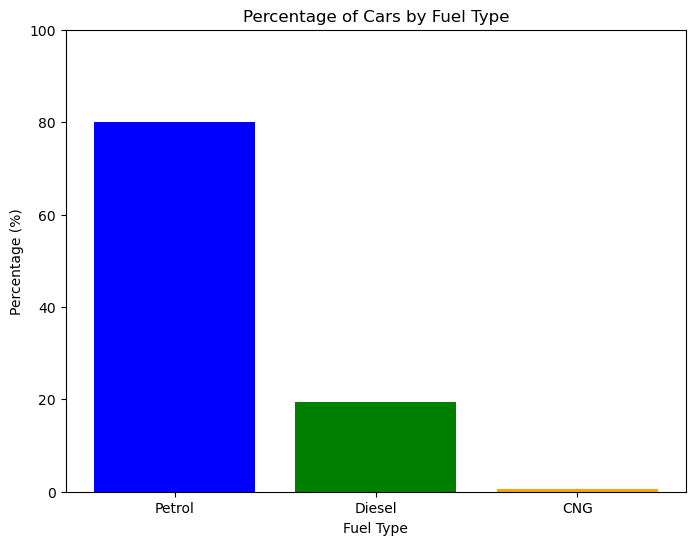

In [15]:
petrol_percentage = (len(cars[cars["Fuel_Type"] == 'Petrol']) / len(cars)) * 100
print(f"Petrol percentage is {petrol_percentage:.2f}%")
diesel_percentage = (len(cars[cars["Fuel_Type"] == 'Diesel']) / len(cars)) * 100
print(f"Diesel percentage is {diesel_percentage:.2f}%")
cng_percentage = (len(cars[cars["Fuel_Type"] == 'CNG']) / len(cars)) * 100
print(f"CNG percentage is {cng_percentage:.2f}%")

# Data for the bar plot
fuel_types = ['Petrol', 'Diesel', 'CNG']
percentages = [petrol_percentage, diesel_percentage, cng_percentage]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(fuel_types, percentages, color=['blue', 'green', 'orange'])
plt.title('Percentage of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit to 0-100%
plt.show()

Text(0, 0.5, 'Count')

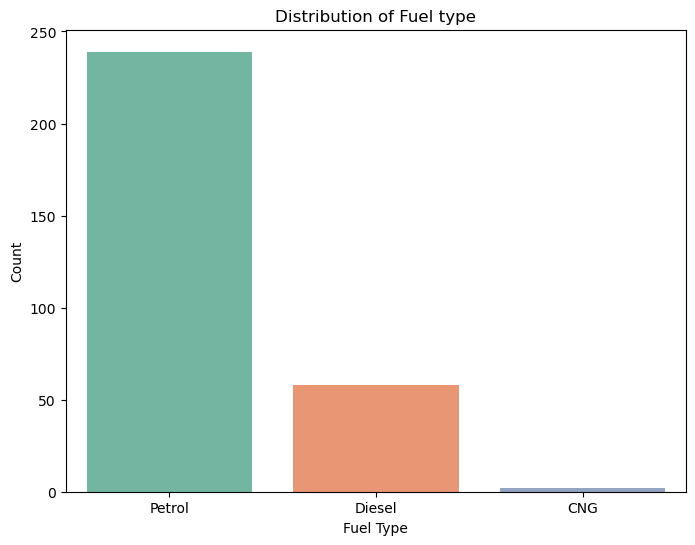

In [16]:

#distribution of fuel types (Petrol, Diesel, CNG)
plt.figure(figsize=(8,6))
sns.countplot(x= 'Fuel_Type', data= cars, palette='Set2')
plt.title("Distribution of Fuel type")
plt.xlabel("Fuel Type")
plt.ylabel("Count")

Text(0.5, 1.0, 'Distribution of Transimission')

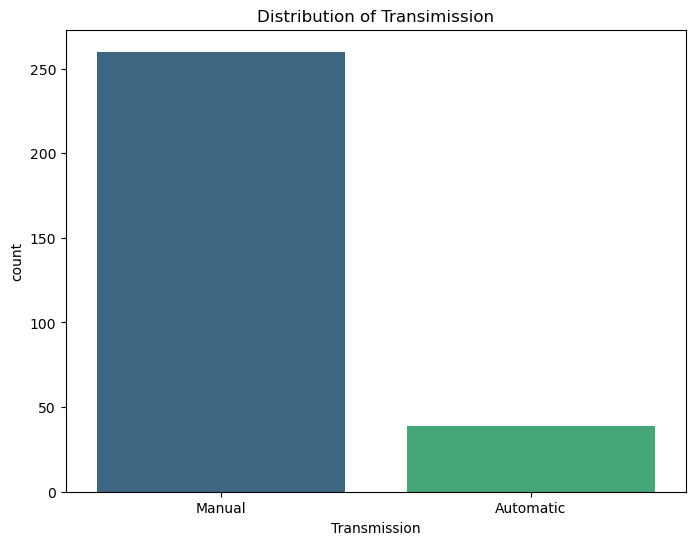

In [17]:
#Which transmission type (Manual or Automatic) is more common in the dataset
plt.figure(figsize=(8, 6))
sns.countplot(x= 'Transmission', data= cars, palette='viridis')
plt.title("Distribution of Transimission")

Most cars sold are manual transmissions

Text(0.5, 0, 'Selling Price')

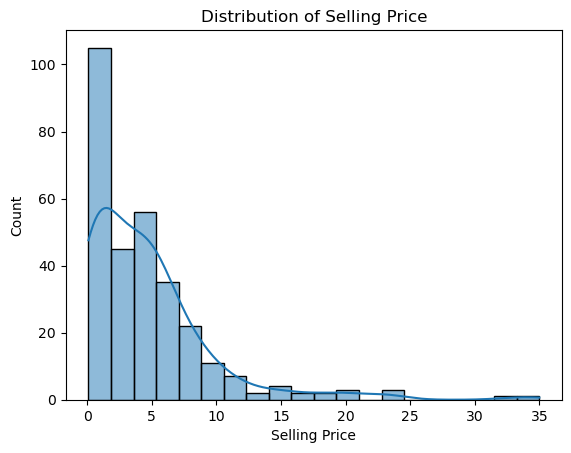

In [18]:
#Distribution of the target variable
sns.histplot(x= 'Selling_Price',kde= True,bins=20,data= cars)
plt.title("Distribution of Selling Price")
plt.xlabel("Selling Price")

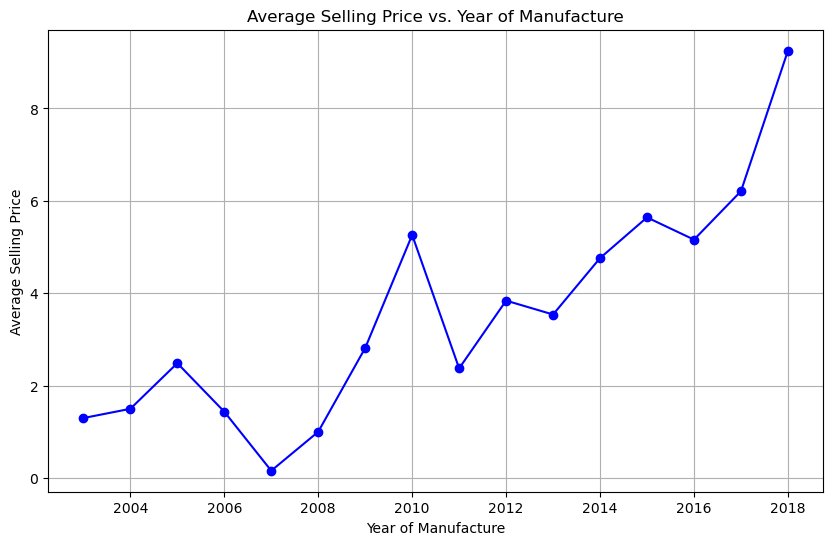

In [19]:
#selling price vary with the year of manufacture?
yearly_avg_price = cars.groupby('Manufacturing_Year')['Selling_Price'].mean().reset_index()
#Visualization of Year vs Manufacturing Price
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_price['Manufacturing_Year'], yearly_avg_price['Selling_Price'], marker='o', linestyle='-', color='b')
plt.title('Average Selling Price vs. Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Average Selling Price')
plt.grid(True)
plt.show()

The graph shows that newer cars generally have higher selling prices, while older ones depreciate over time. Although the trend is upward, some years experience temporary dips due to market conditions or model demand. A sharp rise after 2015 suggests that newer models retain more value

Text(0, 0.5, 'Count')

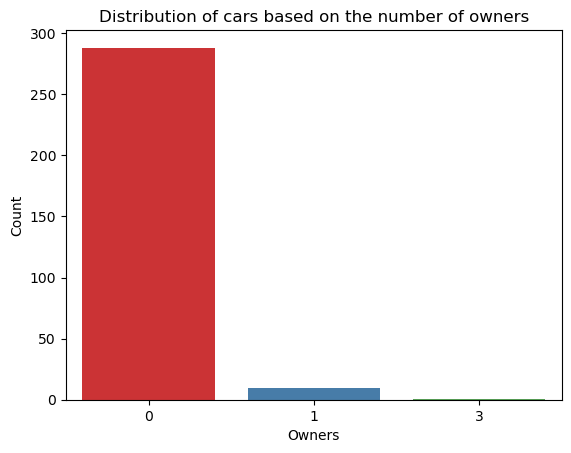

In [20]:
#distribution of cars based on the number of owners (0, 1, or more)
sns.countplot(x="Owner", data= cars, palette="Set1")
plt.title("Distribution of cars based on the number of owners")
plt.xlabel("Owners")
plt.ylabel("Count")

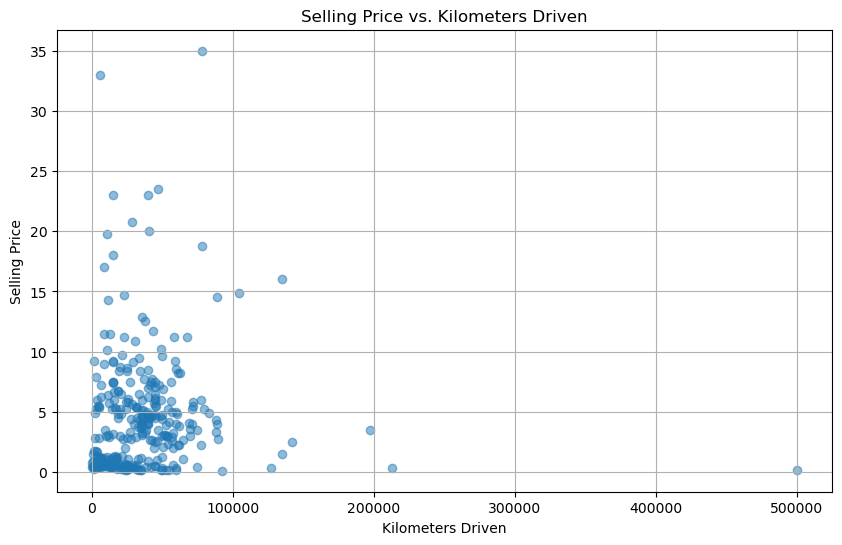

In [21]:
#Selling Price vs Kilometers driven
# Scatter plot: Kilometers Driven vs. Selling Price
plt.figure(figsize=(10, 6))
plt.scatter(cars['Driven_kms'], cars['Selling_Price'], alpha=0.5)
plt.title('Selling Price vs. Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.grid(True)
plt.show()

The scatter plot shows the relationship between kilometers driven and selling price of cars. In general, cars with lower kilometers driven tend to have higher selling prices, indicating that usage affects resale value. As kilometers driven increase, selling prices decrease, though some exceptions exist, possibly due to brand, model, or maintenance quality

Text(0, 0.5, 'Count')

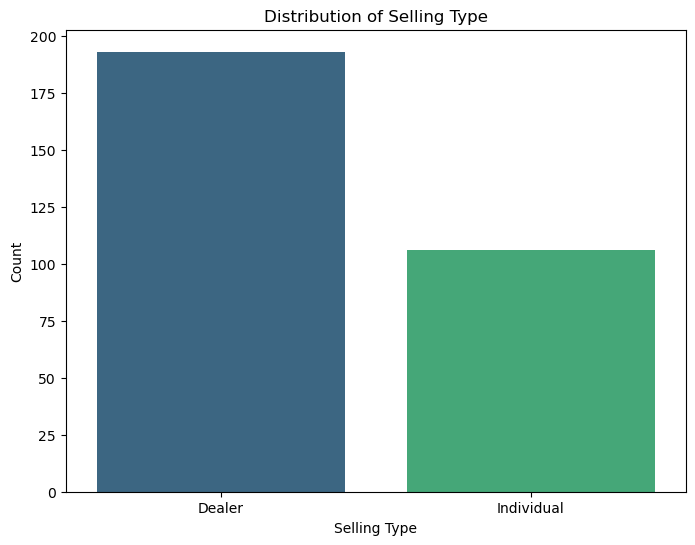

In [22]:
#Distribution of selling type
plt.figure(figsize=(8, 6))
sns.countplot(x="Selling_type", data= cars, palette="viridis")
plt.title('Distribution of Selling Type')
plt.xlabel('Selling Type')
plt.ylabel('Count')


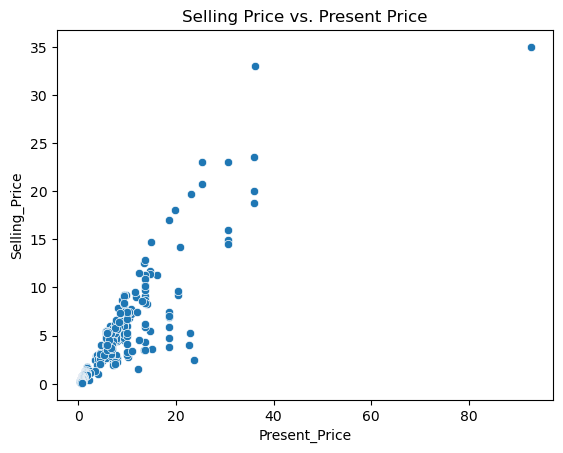

In [23]:
# Selling Price vs. Present Price (Scatter Plot)
sns.scatterplot(x='Present_Price', y='Selling_Price', data=cars)
plt.title('Selling Price vs. Present Price')
plt.show()

The plot visualizes the relationship between the present price and selling price
There is a strong positive relationship between the present price and selling price, indicating that higher-priced cars tend to sell for more.

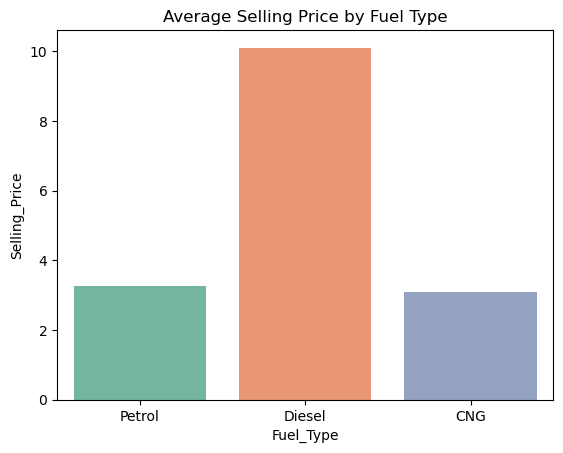

In [24]:
#Average Selling Price by Fuel Type (Bar Plot)
sns.barplot(x='Fuel_Type', y='Selling_Price', data=cars, estimator='mean', ci= None, palette="Set2")
plt.title('Average Selling Price by Fuel Type')
plt.show()

The barplot shows the average selling price by fuel type. Cars which use diesel are more expensive compared to cars which use other fuel types


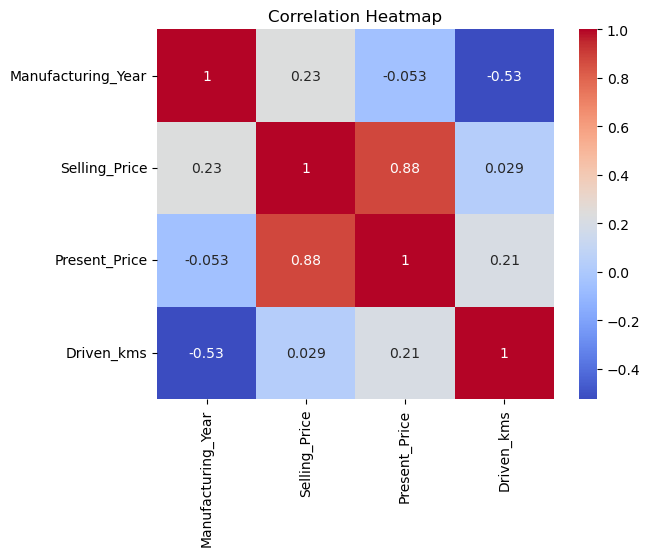

In [25]:
#Correlation of numerical values
numerical_cols = ['Manufacturing_Year', 'Selling_Price', 'Present_Price', 'Driven_kms']
sns.heatmap(cars[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

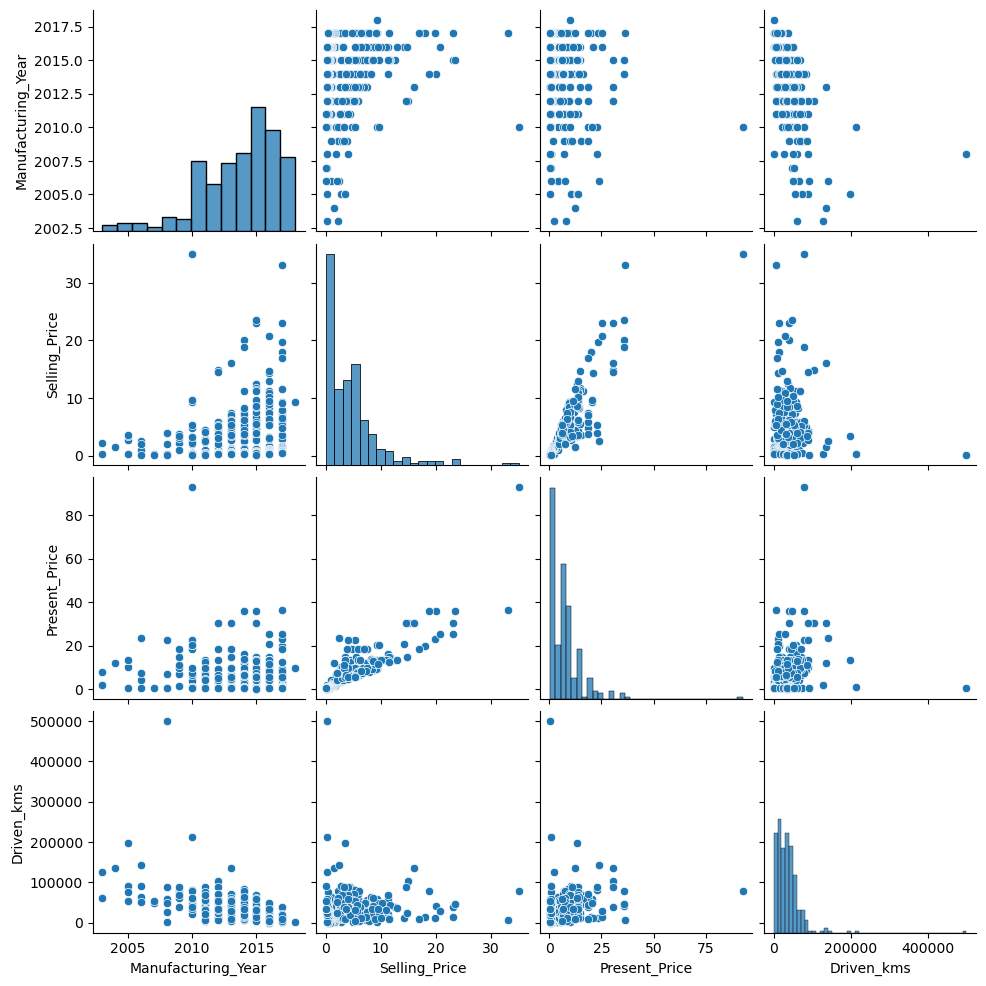

In [26]:
#Pairplot
sns.pairplot(cars[numerical_cols])
plt.show()


This pairplot visualizes relationships between numerical variables in the dataset.
Selling_Price and Present_Price show a strong positive correlation, meaning higher present prices lead to higher selling prices.
Manufacturing_Year negatively correlates with Driven_kms, indicating that older cars tend to have more kilometers driven.

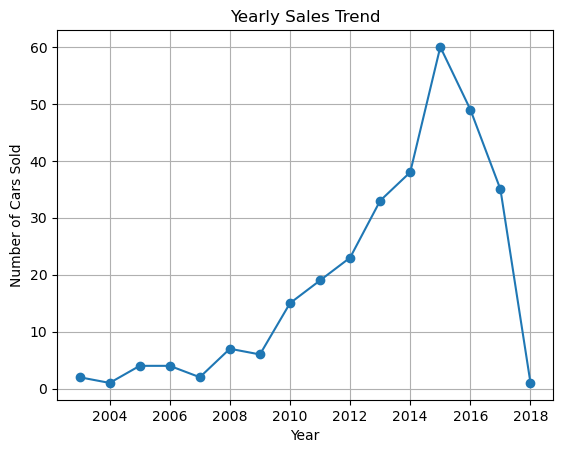

In [27]:
#Yearly sales trend
yearly_sales = cars['Manufacturing_Year'].value_counts().sort_index()
plt.plot(yearly_sales.index, yearly_sales.values, marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.grid()
plt.show()

The plot shows fluctuations in car sales over the years, with peaks and dips

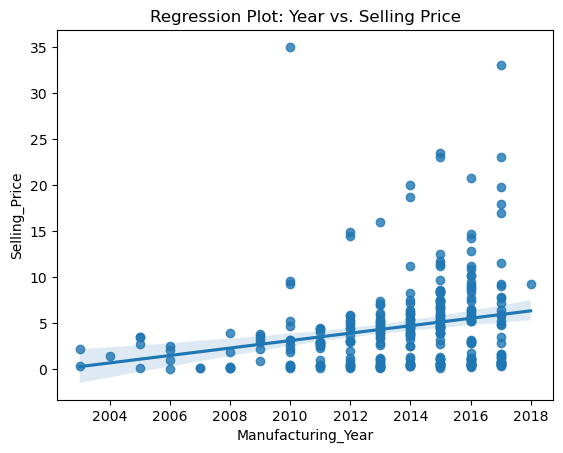

In [28]:
#linear relationship between year and price.
sns.regplot(x='Manufacturing_Year', y='Selling_Price', data=cars)
plt.title('Regression Plot: Year vs. Selling Price')
plt.show()

This plot shows that newer cars (higher manufacturing year) tend to have higher selling prices.

Feature engineering and selection

1.Create Age from Year.
2.Bin Driven_kms into categories.
3.Create interaction features (Fuel_Type * Transmission).
4.One-hot encode categorical variables.

In [29]:
#Create Age from Year
current_year= 2025
cars['car_age']= current_year- cars["Manufacturing_Year"]
cars.head()

,Car_Name,Manufacturing_Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [30]:
#Bin Driven_kms into categories
bins = [0, 20000, 50000, 100000, 200000]
labels = ['Low', 'Medium', 'High', 'Very High']
cars['Mileage'] = pd.cut(cars['Driven_kms'], bins=bins, labels=labels)
cars.head()

,Car_Name,Manufacturing_Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age,Mileage
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11,Medium
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12,Medium
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8,Low
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14,Low
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11,Medium


In [31]:
#Create interaction features (Fuel_Type * Transmission)
cars['Fuel_Transmission'] = cars['Fuel_Type'] + '_' + cars['Transmission']
cars.head()

,Car_Name,Manufacturing_Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,car_age,Mileage,Fuel_Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11,Medium,Petrol_Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12,Medium,Diesel_Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8,Low,Petrol_Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14,Low,Petrol_Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11,Medium,Diesel_Manual


In [36]:
#Dropping Car_Name column
cars.drop('Car_Name', axis = 1, inplace=True)
cars.columns

Index(['Manufacturing_Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner', 'car_age',
       'Mileage', 'Fuel_Transmission'],
      dtype='object')

In [37]:
#Encoding
cars_encoded = pd.get_dummies(cars,
columns=['Fuel_Type', 'Selling_type', 'Transmission', 'Mileage', 'Fuel_Transmission'],
    drop_first=True
)

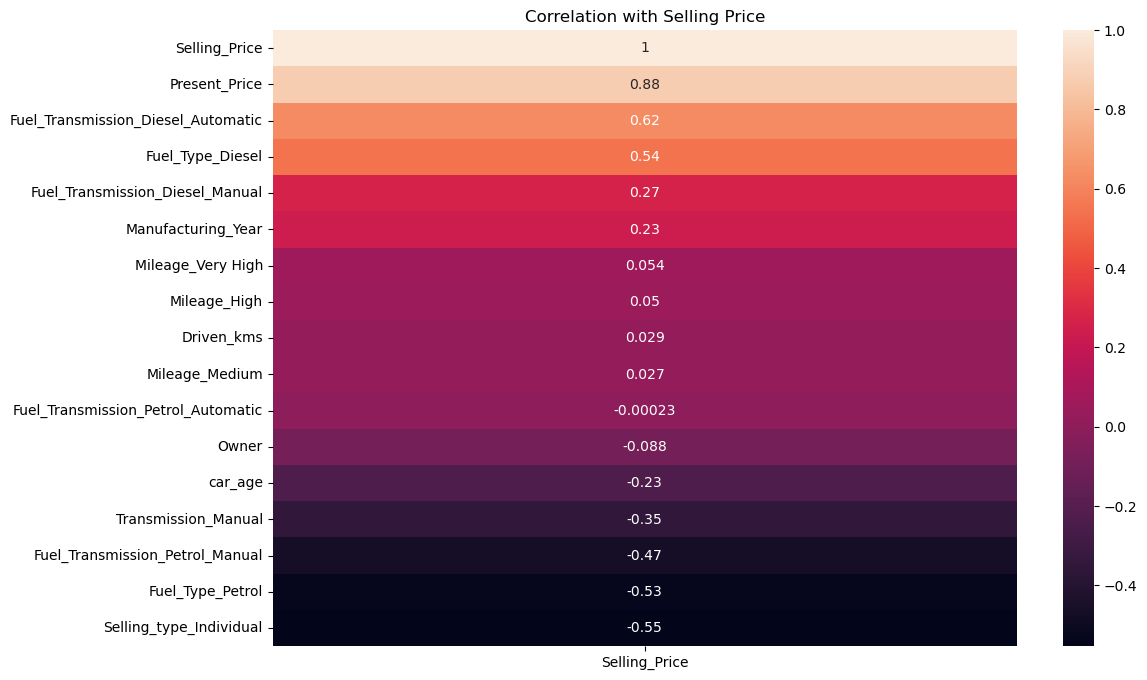

In [38]:
#Correlation Analysis
correlation_matrix = cars_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Selling_Price']].sort_values(by='Selling_Price', ascending=False), annot=True)
plt.title('Correlation with Selling Price')
plt.show()

This plot shows the correlation between numerical features and the target variable (Selling_Price).
Present_Price has a strong positive correlation with Selling_Price.
Manufacturing_Year also shows a positive correlation.
Features like Owner and car_age have a negative correlation with Selling_Price.

Model Training

In [113]:
#Features and target
X= cars.drop("Selling_Price", axis = 1)
y= cars["Selling_Price"]

#Splitting the data
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
label_encoder = LabelEncoder()
X_train['Fuel_Type'] = label_encoder.fit_transform(X_train['Fuel_Type'])
X_test['Fuel_Type'] = label_encoder.transform(X_test['Fuel_Type'])

X_train['Selling_type'] = label_encoder.fit_transform(X_train['Selling_type'])
X_test['Selling_type'] = label_encoder.transform(X_test['Selling_type'])

X_train['Transmission'] = label_encoder.fit_transform(X_train['Transmission'])
X_test['Transmission'] = label_encoder.transform(X_test['Transmission'])

X_train['Mileage'] = label_encoder.fit_transform(X_train['Mileage'])
X_test['Mileage'] = label_encoder.transform(X_test['Mileage'])

X_train['Fuel_Transmission'] = label_encoder.fit_transform(X_train['Fuel_Transmission'])
X_test['Fuel_Transmission'] = label_encoder.transform(X_test['Fuel_Transmission'])
#label_encoder.fit_transform([['Fuel_Type', 'Selling_type', 'Transmission', 'Mileage', 'Fuel_Transmission']])

In [ ]:
#Standardising data
scaler= StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [255]:
y_pred_baseline= [y_train.mean()]* len(y_train)
mae_baseline= mean_absolute_error(y_train,y_pred_baseline)
print(f"The MAE of the baseline model is {mae_baseline}")

The MAE of the baseline model is 3.3849918593862145


In [ ]:
#Model training
lr= LinearRegression()
rf= RandomForestRegressor()
gb= GradientBoostingRegressor()
xr= XGBRegressor()

lr.fit(X_train,y_train)
print(f"{lr} \nmodel trained successfully!")
rf.fit(X_train,y_train)
print(f"{rf}\n model trained successfully!")
gb.fit(X_train,y_train)
print(f"{gb} \nmodel trained successfully!")
xr.fit(X_train,y_train)
print(f"{xr} \nmodel trained successfully!")


LinearRegression() 
model trained successfully!
RandomForestRegressor()
 model trained successfully!
GradientBoostingRegressor() 
model trained successfully!
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) 
model trained successfully!


In [231]:
#Accuracy
linear_score=lr.score(X_test,y_test)
print(f"Accuracy score LinearRegression is {linear_score:2f}")
random_score= rf.score(X_test,y_test)
print(f"Accuracy score Random Forest is {random_score:2f}")
gradient_score= gb.score(X_test,y_test)
print(f"Accuracy score GradientBoost is {gradient_score:2f}")
xgb_score= xr.score(X_test,y_test)
print(f"Accuracy score XGBRegressor is {xgb_score:2f}") 

Accuracy score LinearRegression is 0.743422
Accuracy score Random Forest is 0.413490
Accuracy score GradientBoost is 0.693247
Accuracy score XGBRegressor is 0.798654


The best performing model is XGBRegressor with 79.86% accuracy score

In [ ]:
#Define parameter grids for each model
param_grids = {
    'Linear Regression': {},#Linear Regression doesn't have any parameters to tune
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    },
    'XGBRegressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10]
    }
}

# Define models
models = {
    'Linear Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor()
}

best_models = {}
results = {}

for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    
    # Check if the model is a pipeline to avoid double scaling for tree-based models
    if 'Linear Regression' in model_name:
        pipeline = model
        param_grid = param_grids[model_name]
    else:
        pipeline = model
        param_grid = param_grids[model_name]
    
    # Use GridSearchCV to find the best parameters
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model and results
    best_models[model_name] = grid_search.best_estimator_
    preds = grid_search.best_estimator_.predict(X_test)
    
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'MSE': mean_squared_error(y_test, preds),
        'R²': r2_score(y_test, preds),
        'MAE': mean_absolute_error(y_test,preds)
    }

# Print results
print("\nBest Model Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"MSE: {metrics['MSE']:.2f}")
    print(f"R²: {metrics['R²']:.4f}")
    print(f"MAE: {metrics['MAE']:.4f}")

# Identify the best model
best_model_name = min(results, key=lambda k: results[k]['MSE'])
print(f"\nThe best model is {best_model_name} with an MSE of {results[best_model_name]['MSE']:.2f}")

Tuning Linear Regression...
Tuning Random Forest...
Tuning Gradient Boosting...
Tuning XGBRegressor...

Best Model Results:

Linear Regression
Best Parameters: {}
MSE: 6.61
R²: 0.7434
MAE: 1.5457

Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 50}
MSE: 16.64
R²: 0.3546
MAE: 1.6173

Gradient Boosting
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
MSE: 8.24
R²: 0.6803
MAE: 1.2982

XGBRegressor
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
MSE: 3.61
R²: 0.8600
MAE: 0.9248

The best model is XGBRegressor with an MSE of 3.61


In [313]:
#Feature importance
#the best model is XGBRegressor
best_model = best_models['XGBRegressor']

# Get feature importances
feature_importance = best_model.feature_importances_

# Map feature importance scores to feature names
feature_names = X_train.columns  # Ensure X_train contains the original feature names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print("Top 10 Features by Importance:")
print(importance_df.head(10))

Top 10 Features by Importance:
              Feature  Importance
1       Present_Price    0.722966
0  Manufacturing_Year    0.131015
3           Fuel_Type    0.084633
9   Fuel_Transmission    0.042161
2          Driven_kms    0.009682
8             Mileage    0.006310
5        Transmission    0.002355
6               Owner    0.000878
4        Selling_type    0.000000
7             car_age    0.000000


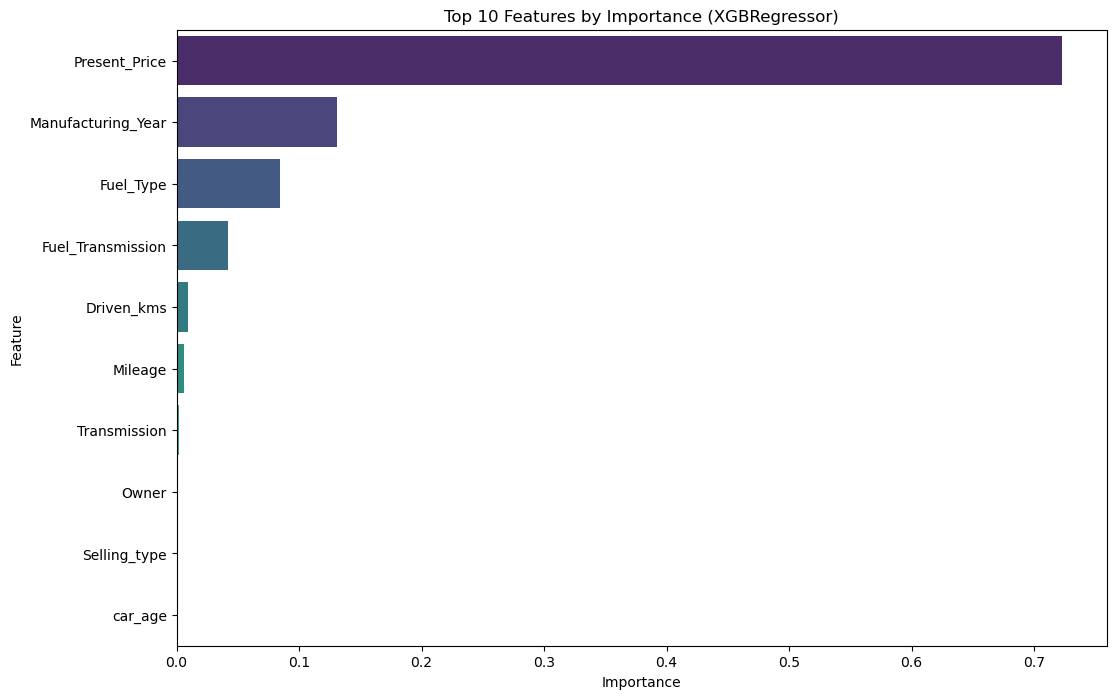

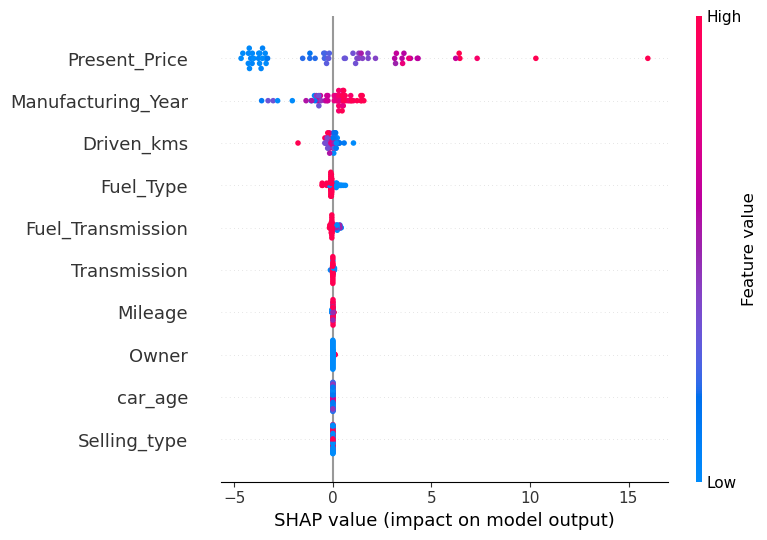

In [321]:
#Visualize feature importance
# 1. Get feature importances
best_model = best_models[best_model_name]
feature_importance = best_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 2. Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title(f'Top 10 Features by Importance ({best_model_name})')
plt.show()

# 3. SHAP summary plot (for tree-based models)
if 'XGB' in best_model_name or 'Forest' in best_model_name:
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)
    shap.summary_plot(shap_values, X_test, feature_names=feature_names)

Present_Price is the most important feature, followed by Manufacturing_Year and Driven_kms.
Features like Transmission and Owner have lower importance.

Shows the impact of each feature on the model's predictions using SHAP (SHapley Additive exPlanations) values.
X-axis (SHAP value): Represents the impact on the model output (positive or negative).
Y-axis (Features): Lists the features ranked by their importance.
Features like Present_Price and Manufacturing_Year have a strong positive impact on the predicted selling price.
Features like Owner and Selling_type have a smaller or negative impact.

Summary of Insights

1.Key Drivers of Selling Price:
'Present_Price` and `Manufacturing_Year` are the most important features.
Newer cars and higher-priced cars tend to have higher selling prices.

2.Correlation Analysis:
Features like `Present_Price` and `Manufacturing_Year` are positively correlated with selling price.
Features like `Owner` and `car_age` are negatively correlated.

3.Trends:
Newer cars (higher manufacturing year) have higher selling prices.
The number of cars sold fluctuates over the years.

4. Model Insights:
The XGBRegressor model identifies `Present_Price`, `Manufacturing_Year`, and `Driven_kms` as the most important features.
SHAP values provide detailed insights into how each feature impacts predictions.


Coclusion:

The car price prediction project successfully identified the best model, XGBRegressor,which achieved the lowest Mean Squared Error (MSE) after hyperparameter tuning. Feature importance analysis revealed that Present_Price had the highest impact on Selling_Price, followed by Manufacturing_Year and Fuel_Type, while features like car_age and selling_type had a lesser influence. These insights can help car sellers set competitive prices and assist buyers in making informed decisions. The model can be leveraged by dealerships for automated price estimation, enhancing efficiency. 

Future improvements could include incorporating additional features like brand name,brand reputation and service history and deploying the model for real-time pricing predictions.